In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [6]:
image_path = "../Output_videos/cropped_image.jpg"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

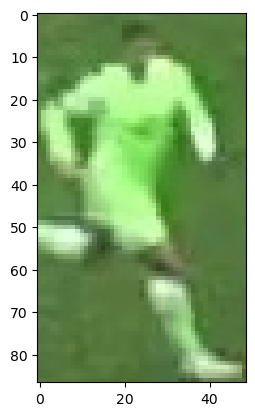

In [7]:
plt.imshow(image)

# Use only top half of the Image

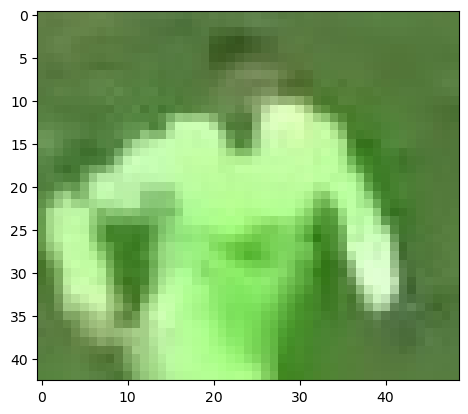

In [8]:
image = image[0:int(image.shape[0]/2),:]

plt.imshow(image)

## Cluster the Image into 2 clusters

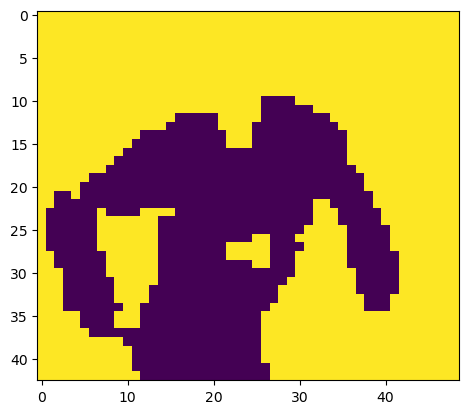

In [11]:
image_2d = image.reshape(-1,3)
# Use k-means clustering
Kmean = KMeans(n_clusters=2, random_state=0)
Kmean.fit(image_2d)

# Get the labels
labels = Kmean.labels_
# Reshape the labels into the original image shape
labels = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(labels)

In [13]:
# kMean can assign background as 0 or 1
# get the class of the corners of the image

corner_clusters =[labels[0,0],labels[0,-1],labels[-1,0],labels[-1,-1]]
non_player_clusters = max(set(corner_clusters), key=corner_clusters.count)

print(non_player_clusters)

1


In [14]:
player_cluster = 1 - non_player_clusters

print(player_cluster)

0


In [19]:
Kmean.cluster_centers_[player_cluster]


array([171.        , 235.38389262, 142.37718121])